<a href="https://colab.research.google.com/github/warn4n/dl2025/blob/main/Notebooks/Chap16/16_1_1D_Normalizing_Flows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 16.1: 1D normalizing flows**

This notebook investigates a 1D normalizing flows example similar to that illustrated in figures 16.1 to 16.3 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First we start with a base probability density function

In [10]:
# Define the base pdf
def gauss_pdf(z, mu, sigma):
  """
  Calculates the probability density function of a Gaussian distribution.

  Args:
    z: The input value.
    mu: The mean of the Gaussian distribution.
    sigma: The standard deviation of the Gaussian distribution.

  Returns:
    The probability density at the given input value.
  """
  pr_z = np.exp( -0.5 * (z-mu) * (z-mu) / (sigma * sigma))/(np.sqrt(2*3.1413) * sigma)
  return pr_z

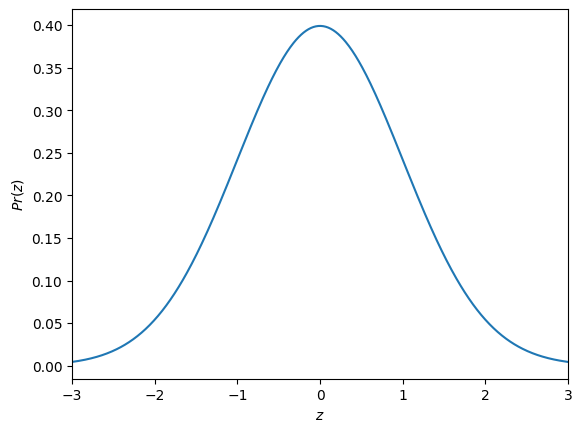

In [3]:
z = np.arange(-3,3,0.01)
pr_z = gauss_pdf(z, 0, 1)

fig,ax = plt.subplots()
ax.plot(z, pr_z)
ax.set_xlim([-3,3])
ax.set_xlabel('$z$')
ax.set_ylabel('$Pr(z)$')
plt.show();

Now let's define a nonlinear function that maps from the latent space $z$ to the observed data $x$.

In [4]:
# Define a function that maps from the base pdf over z to the observed space x
def f(z):
    x1 = 6/(1+np.exp(-(z-0.25)*1.5))-3
    x2 = z
    p = z * z/9
    x = (1-p) * x1 + p * x2
    return x

# Compute gradient of that function using finite differences
def df_dz(z):
    return (f(z+0.0001)-f(z-0.0001))/0.0002

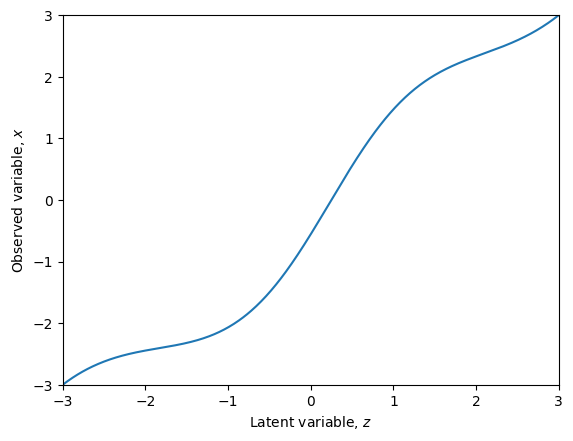

In [5]:
x = f(z)
fig, ax = plt.subplots()
ax.plot(z,x)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_xlabel('Latent variable, $z$')
ax.set_ylabel('Observed variable, $x$')
plt.show()

Now let's evaluate the density in the observed space using equation 16.1

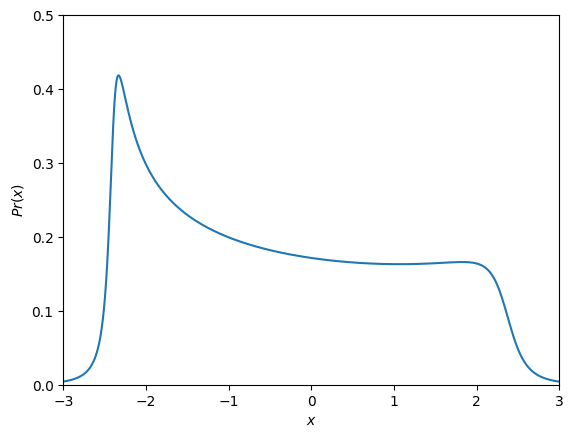

In [11]:
# TODO -- plot the density in the observed space
# Replace these line
x = f(z)
pr_x = pr_z / np.abs(df_dz(z))

# Plot the density in the observed space
fig,ax = plt.subplots()
ax.plot(x, pr_x)
ax.set_xlim([-3,3])
ax.set_ylim([0, 0.5])
ax.set_xlabel('$x$')
ax.set_ylabel('$Pr(x)$')
plt.show();

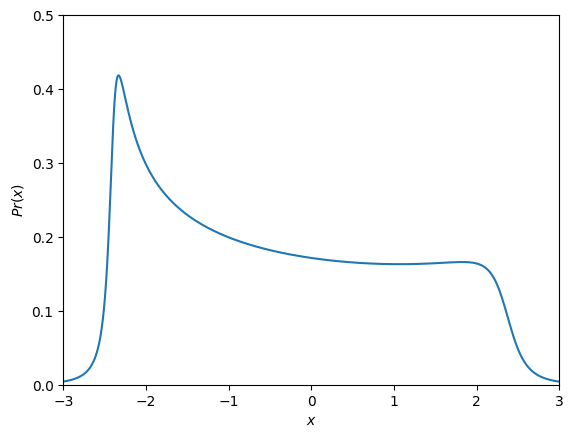

In [8]:
# Plot the density in the observed space
fig,ax = plt.subplots()
ax.plot(x, pr_x)
ax.set_xlim([-3,3])
ax.set_ylim([0, 0.5])
ax.set_xlabel('$x$')
ax.set_ylabel('$Pr(x)$')
plt.show();

In [31]:
#np.random.seed(1)
n_sample = 60

# TODO -- Draw samples from the modeled density
# Replace this line
x_samples = f(np.random.normal(0, 1, n_sample))

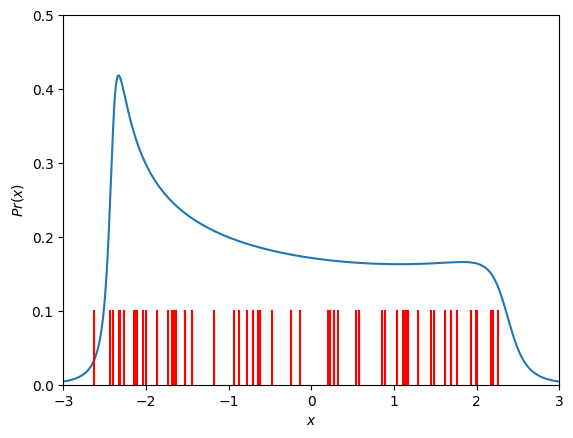

In [32]:
# Draw the samples
fig,ax = plt.subplots()
ax.plot(x, pr_x)
for x_sample in x_samples:
  ax.plot([x_sample, x_sample], [0,0.1], 'r-')

ax.set_xlim([-3,3])
ax.set_ylim([0, 0.5])
ax.set_xlabel('$x$')
ax.set_ylabel('$Pr(x)$')
plt.show();

### Inverse Mapping

Now let's visualize the inverse mapping from the observed space $x$ back to the latent space $z$. Since $x = f(z)$, the inverse mapping is $z = f^{-1}(x)$. We can visualize this by plotting $z$ against $x$.

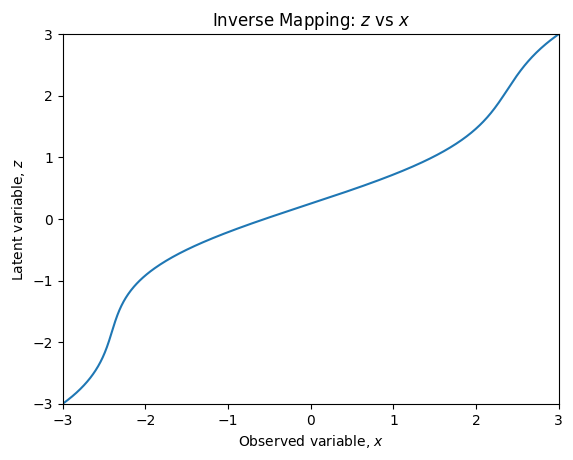

In [34]:
# Plot the inverse mapping
fig, ax = plt.subplots()
ax.plot(x, z) # Plot z on the y-axis and x on the x-axis
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_xlabel('Observed variable, $x$')
ax.set_ylabel('Latent variable, $z$')
ax.set_title('Inverse Mapping: $z$ vs $x$')
plt.show()

# Task
Create a visualization in the Jupyter notebook that shows how a chunk of probability mass in the latent space distribution (z) translates to the corresponding probability mass in the observed space distribution (x) through the inverse mapping function.

## Define a range in the latent space

### Subtask:
Choose a small interval $[z_1, z_2]$ in the latent space where we want to visualize the probability mass.


**Reasoning**:
Define the start and end points for the interval in the latent space.



In [35]:
z_start = -0.5
z_end = z_start + 0.2

## Calculate corresponding values in the observed space

### Subtask:
Determine the interval $[x_1, x_2]$ in the observed space by applying the function $f$ to the endpoints of the latent space interval, i.e., $x_1 = f(z_1)$ and $x_2 = f(z_2)$.


**Reasoning**:
Calculate the corresponding interval in the observed space by applying the function f to the start and end points of the latent space interval.



In [36]:
x_start = f(z_start)
x_end = f(z_end)

## Visualize the probability mass in the latent space

### Subtask:
Plot the probability density function of $z$ and highlight the area under the curve between $z_1$ and $z_2$ to represent the probability mass.


**Reasoning**:
Plot the probability density function of z and highlight the area under the curve between z_start and z_end to represent the probability mass, following the instructions.



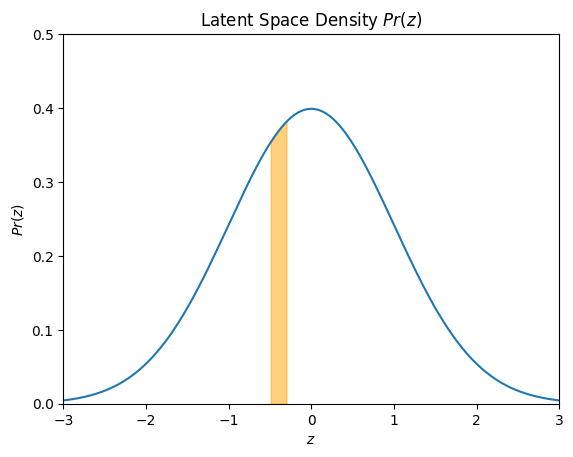

In [37]:
# Plot the probability density function of z and highlight the area
fig, ax = plt.subplots()
ax.plot(z, pr_z)

# Find the indices corresponding to z_start and z_end
z_indices = np.where((z >= z_start) & (z <= z_end))
z_subset = z[z_indices]
pr_z_subset = pr_z[z_indices]

# Fill the area under the curve
ax.fill_between(z_subset, pr_z_subset, color='orange', alpha=0.5)

ax.set_xlim([-3,3])
ax.set_ylim([0, 0.5])
ax.set_xlabel('$z$')
ax.set_ylabel('$Pr(z)$')
ax.set_title('Latent Space Density $Pr(z)$')
plt.show()

## Visualize the corresponding probability mass in the observed space

### Subtask:
Plot the probability density function of $x$ and highlight the area under the curve between $x_1$ and $x_2$ to show the transformed probability mass.


**Reasoning**:
Plot the probability density function of x and highlight the area under the curve between x_start and x_end to show the transformed probability mass.



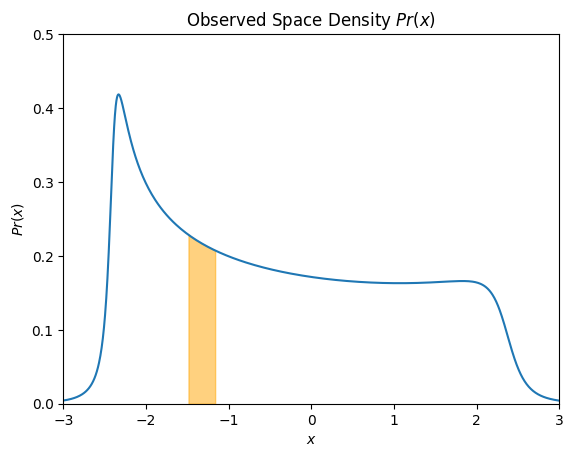

In [38]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the probability density function of x
ax.plot(x, pr_x)

# Find the indices in the x array that fall within the range defined by x_start and x_end
x_indices = np.where((x >= x_start) & (x <= x_end))

# Extract the corresponding subsets of the x and pr_x arrays
x_subset = x[x_indices]
pr_x_subset = pr_x[x_indices]

# Fill the area under the curve between x_start and x_end
ax.fill_between(x_subset, pr_x_subset, color='orange', alpha=0.5)

# Set the x-axis limits and y-axis limits
ax.set_xlim([-3, 3])
ax.set_ylim([0, 0.5])

# Label the x-axis and y-axis
ax.set_xlabel('$x$')
ax.set_ylabel('$Pr(x)$')

# Add a title to the plot
ax.set_title('Observed Space Density $Pr(x)$')

# Display the plot
plt.show()

## Add connecting lines

### Subtask:
Draw lines or arrows connecting the chosen interval in the $z$ plot to the corresponding interval in the $x$ plot to visually illustrate the transformation.


**Reasoning**:
Create a figure with two subplots, plot the probability density of z on the left and the probability density of x on the right.



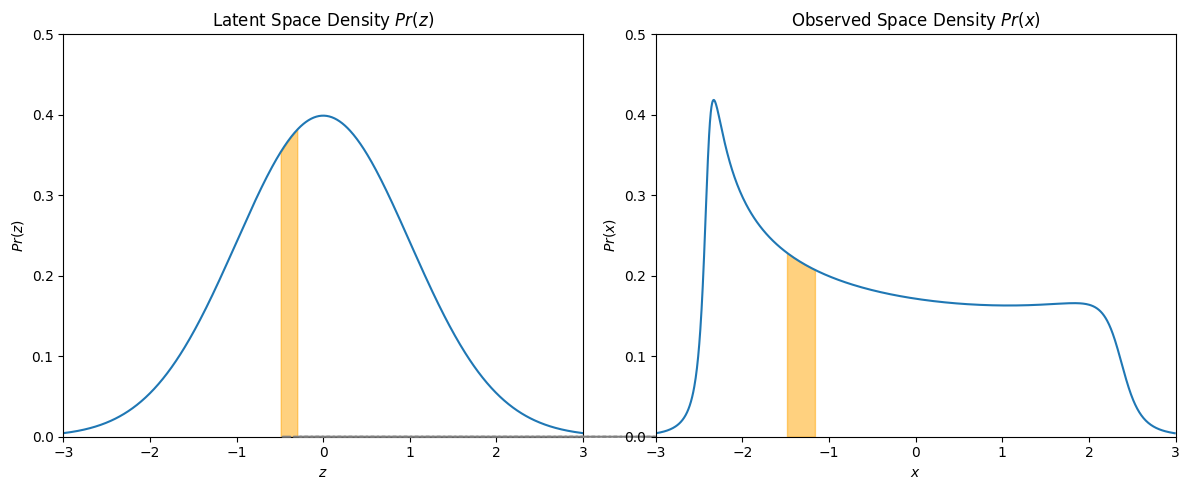

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the probability density function of z on the left subplot
ax1.plot(z, pr_z)

# Highlight the area under the curve between z_start and z_end on the z plot
z_indices = np.where((z >= z_start) & (z <= z_end))
z_subset = z[z_indices]
pr_z_subset = pr_z[z_indices]
ax1.fill_between(z_subset, pr_z_subset, color='orange', alpha=0.5)

ax1.set_xlim([-3,3])
ax1.set_ylim([0, 0.5])
ax1.set_xlabel('$z$')
ax1.set_ylabel('$Pr(z)$')
ax1.set_title('Latent Space Density $Pr(z)$')

# Plot the probability density function of x on the right subplot
ax2.plot(x, pr_x)

# Highlight the area under the curve between x_start and x_end on the x plot
x_indices = np.where((x >= x_start) & (x <= x_end))
x_subset = x[x_indices]
pr_x_subset = pr_x[x_indices]
ax2.fill_between(x_subset, pr_x_subset, color='orange', alpha=0.5)

ax2.set_xlim([-3,3])
ax2.set_ylim([0, 0.5])
ax2.set_xlabel('$x$')
ax2.set_ylabel('$Pr(x)$')
ax2.set_title('Observed Space Density $Pr(x)$')

# Draw lines connecting the chosen interval in the z plot to the corresponding interval in the x plot
# Use the data coordinates for both ends of the annotations
ax1.annotate('', xy=(x_start, 0), xycoords=ax2.transData,
             xytext=(z_start, 0), textcoords=ax1.transData,
             arrowprops=dict(arrowstyle='-', color='gray', lw=1.5, linestyle='--'))

ax1.annotate('', xy=(x_end, 0), xycoords=ax2.transData,
             xytext=(z_end, 0), textcoords=ax1.transData,
             arrowprops=dict(arrowstyle='-', color='gray', lw=1.5, linestyle='--'))


plt.tight_layout()
plt.show();

## Add explanations and labels

### Subtask:
Include titles, axis labels, and possibly annotations to explain what the plot is showing.


**Reasoning**:
Add titles, axis labels, and annotations to the plot to explain the visualization as requested by the subtask.



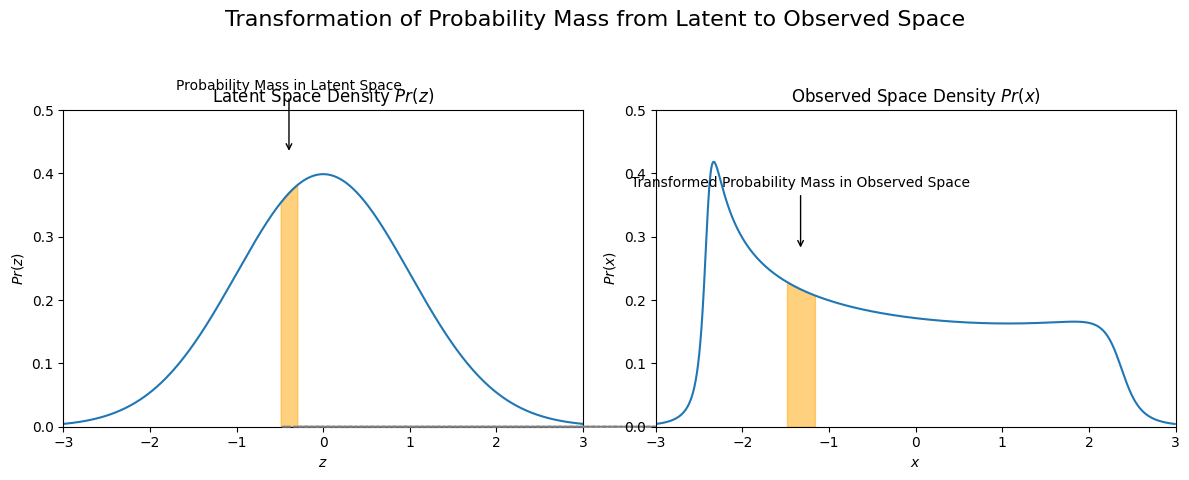

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the probability density function of z on the left subplot
ax1.plot(z, pr_z)

# Highlight the area under the curve between z_start and z_end on the z plot
z_indices = np.where((z >= z_start) & (z <= z_end))
z_subset = z[z_indices]
pr_z_subset = pr_z[z_indices]
ax1.fill_between(z_subset, pr_z_subset, color='orange', alpha=0.5)

ax1.set_xlim([-3,3])
ax1.set_ylim([0, 0.5])
ax1.set_xlabel('$z$')
ax1.set_ylabel('$Pr(z)$')
ax1.set_title('Latent Space Density $Pr(z)$')

# Plot the probability density function of x on the right subplot
ax2.plot(x, pr_x)

# Highlight the area under the curve between x_start and x_end on the x plot
x_indices = np.where((x >= x_start) & (x <= x_end))
x_subset = x[x_indices]
pr_x_subset = pr_x[x_indices]
ax2.fill_between(x_subset, pr_x_subset, color='orange', alpha=0.5)

ax2.set_xlim([-3,3])
ax2.set_ylim([0, 0.5])
ax2.set_xlabel('$x$')
ax2.set_ylabel('$Pr(x)$')
ax2.set_title('Observed Space Density $Pr(x)$')

# Draw lines connecting the chosen interval in the z plot to the corresponding interval in the x plot
# Use the data coordinates for both ends of the annotations
ax1.annotate('', xy=(x_start, 0), xycoords=ax2.transData,
             xytext=(z_start, 0), textcoords=ax1.transData,
             arrowprops=dict(arrowstyle='-', color='gray', lw=1.5, linestyle='--'))

ax1.annotate('', xy=(x_end, 0), xycoords=ax2.transData,
             xytext=(z_end, 0), textcoords=ax1.transData,
             arrowprops=dict(arrowstyle='-', color='gray', lw=1.5, linestyle='--'))

# Add a main title to the entire figure
fig.suptitle('Transformation of Probability Mass from Latent to Observed Space', fontsize=16)

# Optional: Add annotations near the highlighted areas
ax1.annotate('Probability Mass in Latent Space', xy=(np.mean(z_subset), np.max(pr_z_subset) + 0.05),
             xytext=(np.mean(z_subset), np.max(pr_z_subset) + 0.15),
             arrowprops=dict(arrowstyle='->', color='black'),
             horizontalalignment='center')

ax2.annotate('Transformed Probability Mass in Observed Space', xy=(np.mean(x_subset), np.max(pr_x_subset) + 0.05),
             xytext=(np.mean(x_subset), np.max(pr_x_subset) + 0.15),
             arrowprops=dict(arrowstyle='->', color='black'),
             horizontalalignment='center')


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show();

## Summary:

### Data Analysis Key Findings

*   A specific interval in the latent space ($z$) was defined and its corresponding interval in the observed space ($x$) was calculated using a mapping function.
*   The probability density functions of both the latent space ($Pr(z)$) and the observed space ($Pr(x)$) were plotted.
*   The probability mass within the defined interval in the latent space was visually highlighted on the $Pr(z)$ plot.
*   The corresponding probability mass in the observed space was visually highlighted on the $Pr(x)$ plot, demonstrating the transformation.
*   Connecting lines were drawn between the highlighted intervals in the two plots to illustrate the mapping.
*   The final visualization includes appropriate titles, axis labels, and annotations to explain the transformation of probability mass from latent to observed space.

### Insights or Next Steps

*   The visualization effectively shows how the inverse mapping function redistributes probability mass from the latent space to the observed space, which is crucial for understanding generative models like normalizing flows.
*   Further analysis could explore how different intervals in the latent space are transformed and how the density changes due to the mapping function's derivative (the Jacobian).
